In [1]:
from IPython import display

# An example of classes

We will demonstrate using a new class of object that we have defined ourselves. The example module 'network_array.py' contains two class definitions, each of which defines a class of Python object. Open up the file if you want to see its workings.

By convention, class definitions are given capitalized names. These appear at the top of the module's list of contents. Our module defines a `Network` class and a `DirectedNetwork` class.

In [2]:
import week04_network_array as network
dir(network)

['DirectedNetwork',
 'Network',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'numpy']

## Undirected network

A class definition typically includes one or more methods for the class. These are defined in the same way as functions, but within the indentation level of the class definition. In addition, the `self` argument to a method represents the object itself, allowing methods to modify the object, like some of the methods for mutable Python objects (e.g. `list.sort()`).

If we ask for help with a class, we see both the overall docstring that we wrote for the class, and the docstrings for the methods.

Methods quoted in `__ __` are not intended to be called directly. Instead, they define the behavior of objects of our class in specific situations.

In [3]:
help(network.Network)

Help on class Network in module network_array:

class Network(builtins.object)
 |  Simple representation of a network as an adjacency matrix.
 |  
 |  The attribute Network.adjMat stores the matrix as a numpy array.
 |  
 |  Add nodes and connections using methods:
 |  Network.add_node()
 |  Network.add_connection()
 |  
 |  Methods defined here:
 |  
 |  __init__(self, nNodes)
 |      Required arguments:
 |      nNodes -- int number of nodes in the network
 |      
 |      Nodes are initialized without connections.
 |      Add connections with Network.add_connection().
 |  
 |  __repr__(self)
 |      Show the network's adjacency matrix.
 |  
 |  add_connection(self, nodeA, nodeB)
 |      Add a new connection between nodeA and nodeB.
 |      
 |      Required arguments:
 |      nodeA, nodeB -- int ID numbers of nodes to connect
 |  
 |  add_nodes(self, nNodes)
 |      Add nNodes new nodes to the network.
 |      
 |      Required arguments:
 |      nNodes -- int number of nodes to add 

Our example class can be used to represent networks of connected nodes. Let's create an instance of the class and use it to represent the simple network of 4 nodes shown [here](https://de.wikipedia.org/wiki/Adjazenzmatrix#/media/File:Ungerichteter_Graph_mit_4_Knoten_und_3_Kanten.svg).

The `__init__()` method defines what occurs when we create a new object that is an instance of the class. We do this simply by using the class name as a function. We do not need to pass in the `self` argument; this is done automatically for each method.

In [4]:
myNetwork = network.Network(4)

The `__repr__()` function defines what gets printed out when we print an object of our class. We have defined this function so that the object will be shown as an [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix), a matrix whose rows and columns represent the nodes of the matrix, and each cell represents the possibility of a connection between those two nodes, with 0 representing no connection, and 1 a connection.

In [5]:
print(myNetwork)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


Note that it is possible to use the special methods directly, and the result is equivalent. But this is not how they are intended to be used.

In [6]:
print(myNetwork.__repr__())

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


We have defined a method `.add_connection()` for adding connections between nodes. Any additional methods that we have defined for our class can be used in the same way as the methods of other Python objects.

In [7]:
for nodeA, nodeB in [(0,1), (1,2), (1,3)]:
    myNetwork.add_connection(nodeA, nodeB)

print(myNetwork)

[[0 1 0 0]
 [1 0 1 1]
 [0 1 0 0]
 [0 1 0 0]]


## Directed network

The adjacency matrix for the network above shows that the network that it represents is *undirected*; the connections are all reciprocal. Each time that we added a connection, the `.add_connection()` method placed a 1 in the adjacency matrix in corresponding positions above and below the diagonal.

The second class definition in our example module defines a *directed* network. In such a network, a connection from node A to node B does not necessarily entail the reverse connection from B to A, and the adjacency matrix will not necessarily be reflected about the diagonal.

However, apart from this feature, the directed network has a lot in common with the undirected network. In such cases, we can define a new class that 'inherits' from an existing class. The definition of the 'parent' class is used for objects of the 'child' class. We need only define any new methods, or re-write any that should be different. In our simple example, only the `.add_connection()` method differs from the parent `Network` class to the child `DirectedNetwork` class.

Let's use it to represent the network of 4 nodes shown [here](https://en.wikipedia.org/wiki/Directed_graph#/media/File:4-tournament.svg).

In [8]:
myDirNetwork = network.DirectedNetwork(4)

for nodeA, nodeB in [(0,1), (0,3), (1,3), (2,0), (2,1), (3,2)]:
    myDirNetwork.add_connection(nodeA, nodeB)

print(myDirNetwork)

[[0 1 0 1]
 [0 0 0 1]
 [1 1 0 0]
 [0 0 1 0]]


## pygraphviz

There are in fact existing Python packages for representing and querying networks. The two most widely-used are [`networkx`](https://networkx.github.io/) and [`pygraphviz`](https://pygraphviz.github.io/), and each has its advantages and disadvantages. `pygraphviz` is intended mainly for visualizing networks.

Here is an example of its use to represent the first example network above.

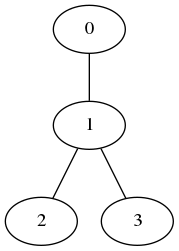

In [9]:
import pygraphviz as pgv

myNetwork = pgv.AGraph()
for nodeA, nodeB in [(0,1), (1,2), (1,3)]:
    myNetwork.add_edge(nodeA, nodeB)

img = myNetwork.draw(format='png', prog='dot')
display.Image(img)

Our example module uses `numpy` arrays to represent the network objects in adjacency matrices. Neither `networkx` nor `pygraphviz` uses adjacency matrices as the main data type. Instead, they use a mixture of dictionaries and other data types. An array adjacency matrix is good for some kinds of calculations involving networks, whereas dictionaries are better for others.